In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import folium

%matplotlib inline

In [2]:
datasets = pd.read_csv("apartments.csv")

In [3]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        657 non-null    object 
 1   Area           657 non-null    object 
 2   Price          657 non-null    object 
 3   Rooms          657 non-null    object 
 4   Floor          657 non-null    object 
 5   Square-meter   657 non-null    object 
 6   Area-text      657 non-null    object 
 7   Elevator       657 non-null    bool   
 8   Air-condition  657 non-null    bool   
 9   Refurbished    657 non-null    bool   
 10  Furniture      657 non-null    bool   
 11  lon            569 non-null    float64
 12  lat            569 non-null    float64
dtypes: bool(4), float64(2), object(7)
memory usage: 48.9+ KB


In [4]:
datasets.columns

Index(['Address', 'Area', 'Price', 'Rooms', 'Floor', 'Square-meter',
       'Area-text', 'Elevator', 'Air-condition', 'Refurbished', 'Furniture',
       'lon', 'lat'],
      dtype='object')

In [5]:
datasets.describe()

,lon,lat
count,569.000000,569.000000
mean,34.785831,32.080090
std,0.016423,0.022820
min,34.763017,32.047895
25%,34.774748,32.060668
50%,34.782489,32.072445
75%,34.793093,32.094886
max,34.835738,32.127621


In [6]:
profile = ProfileReport(datasets, title = "Pandas Profile Report", minimal = True)
profile.to_notebook_iframe()

#### Handlin Missing Data

In [7]:
datasets = datasets[datasets['Price'].str.strip() != 'לא צוין מחיר']
datasets = datasets[datasets['Rooms'].str.strip() != 'לא צוין']
datasets = datasets[datasets['Square-meter'].str.strip() != 'לא צוין']

In [8]:
datasets.drop_duplicates(inplace = True)

In [9]:
datasets.dtypes

Address           object
Area              object
Price             object
Rooms             object
Floor             object
Square-meter      object
Area-text         object
Elevator            bool
Air-condition       bool
Refurbished         bool
Furniture           bool
lon              float64
lat              float64
dtype: object

In [10]:
datasets['Price'] = datasets['Price'].apply(lambda s: s.replace(',', '').replace('$', '').replace('₪', '')).astype('float')

In [11]:
datasets.loc[datasets['Floor'] == 'קרקע', 'Floor'] = 0

####  Data Type Convert

In [12]:
datasets['Price'] = datasets['Price'].astype('float')
datasets['Rooms'] = datasets['Rooms'].astype('float')

datasets['Floor'] = datasets['Floor'].astype('int')
datasets['Square-meter'] = datasets['Square-meter'].astype('int')

In [13]:
datasets.dtypes

Address           object
Area              object
Price            float64
Rooms            float64
Floor              int64
Square-meter       int64
Area-text         object
Elevator            bool
Air-condition       bool
Refurbished         bool
Furniture           bool
lon              float64
lat              float64
dtype: object

####  Data Outlier

/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

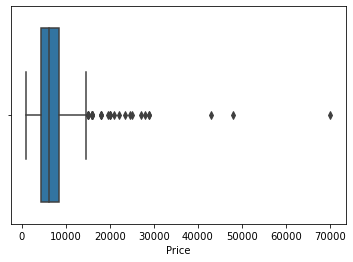

In [14]:
sns.boxplot(datasets['Price'])

In [15]:
datasets = datasets[datasets['Price'] < 25000]

In [16]:
datasets =datasets[datasets['Price'] > 1000]
datasets = datasets[datasets['Square-meter'] > 15]

/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

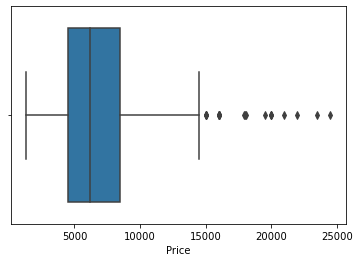

In [17]:
sns.boxplot(datasets['Price'])

####  Exploring Features

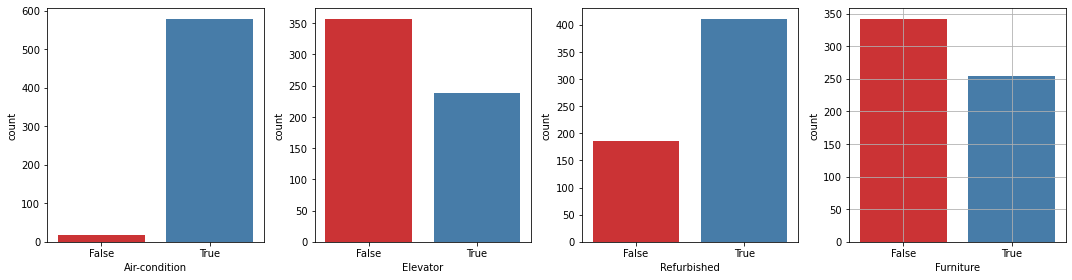

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (15, 4))


sns.countplot(x = 'Air-condition', data = datasets, ax = ax1, palette = 'Set1')
sns.countplot(x = 'Elevator', data = datasets, ax = ax2, palette = 'Set1')
sns.countplot(x = 'Refurbished', data = datasets, ax = ax3, palette = 'Set1')
sns.countplot(x = 'Furniture', data = datasets, ax = ax4, palette = 'Set1')

plt.tight_layout()
plt.grid(True)
plt.show()

/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


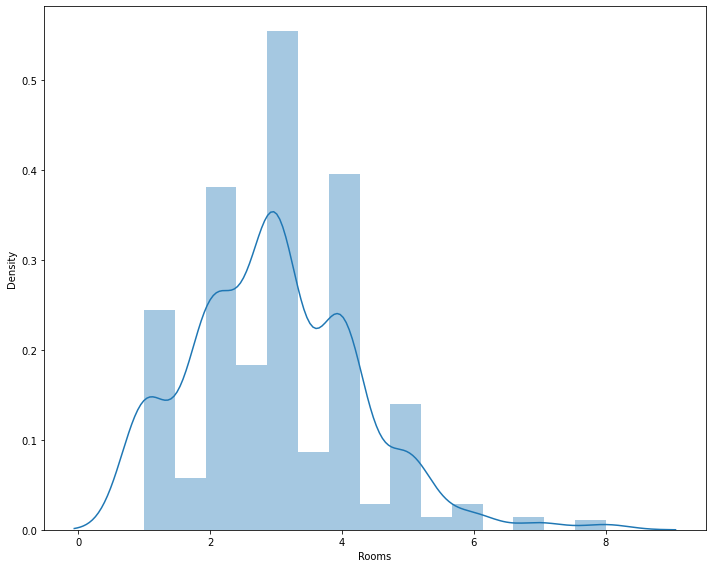

In [19]:
plt.figure(figsize = (10, 8))
sns.distplot(datasets['Rooms'])
plt.tight_layout()
plt.show()

In [20]:
print(datasets['Price'].describe().round())

count      595.0
mean      7017.0
std       3529.0
min       1300.0
25%       4500.0
50%       6200.0
75%       8500.0
max      24500.0
Name: Price, dtype: float64


<Figure size 720x576 with 0 Axes>

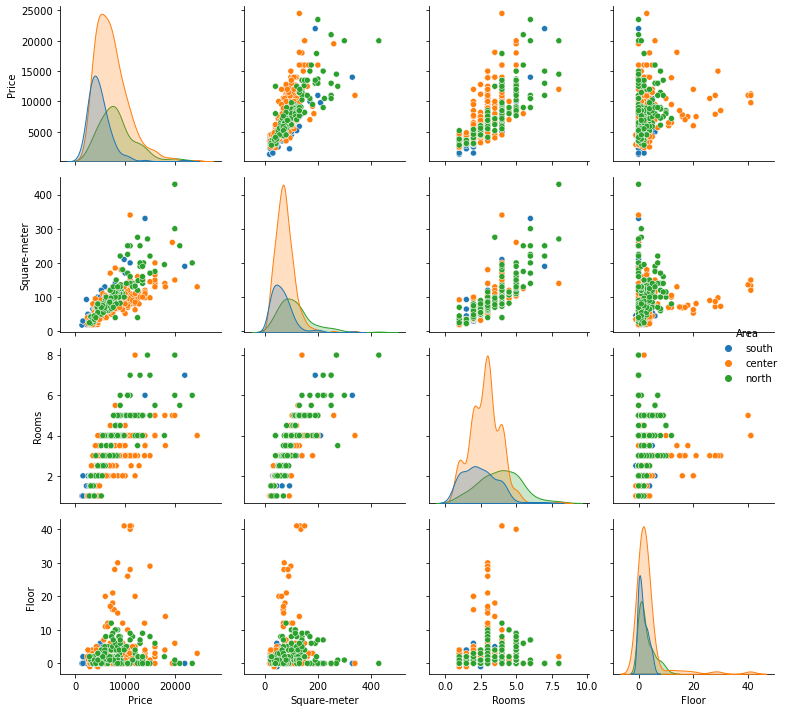

In [21]:
plt.figure(figsize = (10, 8))
sns.pairplot(datasets[['Price', 'Square-meter', 'Rooms', "Floor", "Area"]], hue = "Area")
plt.tight_layout()
plt.show()

####  Relationship Between Number of Rooms and Square meter

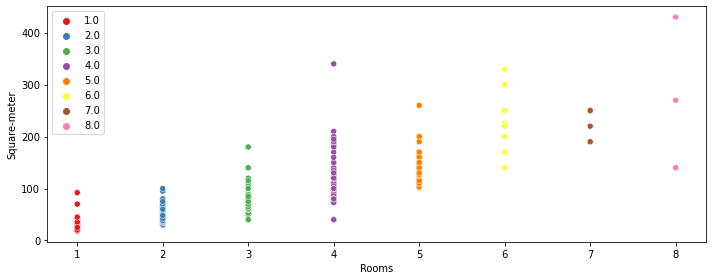

In [22]:
plt.figure(figsize = (10, 4))
rooms = datasets[datasets['Rooms'].apply(lambda x: x%1 == 0)]
sns.scatterplot(x = 'Rooms', y = 'Square-meter', hue = 'Rooms', data = rooms, palette = 'Set1')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


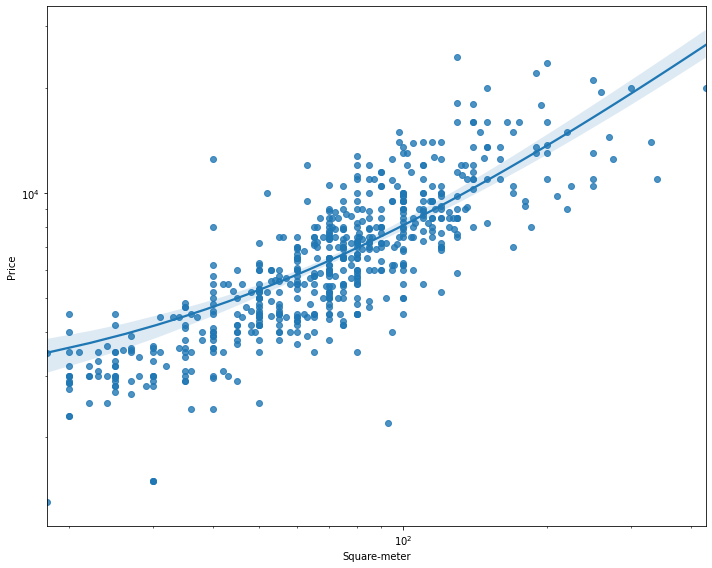

In [23]:
plt.figure(figsize = (10, 8))
plot = sns.regplot(datasets['Square-meter'], datasets['Price'])
plot.set(xscale = 'log', yscale = 'log')
plt.tight_layout()
plt.show()

####  Exploring Interesting Data

Average Price Per Area: Area
center    7275.0
north     8402.0
south     4849.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Area'>

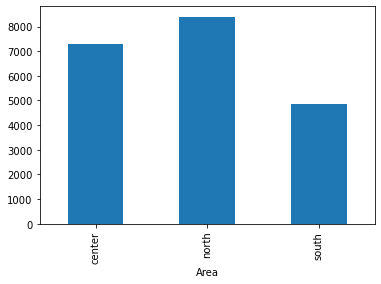

In [24]:
avg_price_per_area= datasets.groupby("Area")['Price'].mean()
print("Average Price Per Area: {}".format(avg_price_per_area.round()))
avg_price_per_area.plot.bar()

####  Price for each square meter for each area

In [25]:
datasets['newArea'] = datasets['Area']
datasets.loc[datasets['Area'].str.contains('center'), 'newArea'] = 'center'
datasets['price_to_meter'] = datasets['Price'] / datasets['Square-meter']
grouped = datasets.groupby('newArea')['price_to_meter'].mean()

In [26]:
print("Price for Each Square Meter for Each Area: {}".format(grouped.round()))

Price for Each Square Meter for Each Area: newArea
center    103.0
north      82.0
south      85.0
Name: price_to_meter, dtype: float64


####  Geographical View

In [27]:
m = folium.Map(location = [32.073333, 34.7999900], zoom_start = 14)

In [28]:
avg_per_meter = datasets.groupby('Area-text')['price_to_meter'].mean().to_dict()

In [29]:
datasets['color'] = datasets.apply(lambda apt: '#FF1700' if (avg_per_meter[apt['Area-text']] < apt['price_to_meter']) else '#2CD31D', axis=1)

In [30]:
for index, row in datasets.iterrows():
    if not np.isnan(row.lat):
        marker = folium.CircleMarker(
        location = [row.lat, row.lon], radius = row['Square-meter'] %10,
        color = row['color'],
        fill_color = row['color'],
        fill_opacity = '0.3',
        popup = row.Address)
        
        m.add_child(marker)

m

In [31]:
apartment_datasets = datasets

#### Libraries for Predict apartment Price

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model


from scipy.stats import logistic
from scipy.special import expit
from scipy.special import logit

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, neighbors

from matplotlib.colors import ListedColormap

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [33]:
features = ['Price', 'Rooms', 'Square-meter', 'Floor', 'Area', 'Area-text', 'Elevator','Refurbished','Furniture']

In [34]:
train_datasets = apartment_datasets[features]

In [35]:
train_datasets = train_datasets.join(pd.get_dummies(train_datasets['Area']))
train_datasets = train_datasets.join(pd.get_dummies(train_datasets['Area-text']))
train_datasets = train_datasets.drop(['Area', 'Area-text'], axis = 1)

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(train_datasets.drop('Price', axis = 1), train_datasets[['Price']], test_size = 0.2)

In [37]:
models = [LinearRegression(),
        RandomForestRegressor(n_estimators = 400, max_features = 'sqrt', criterion = 'mse', min_samples_split = 2),
        KNeighborsRegressor(n_neighbors = 6),
        LogisticRegression(solver = 'liblinear')]

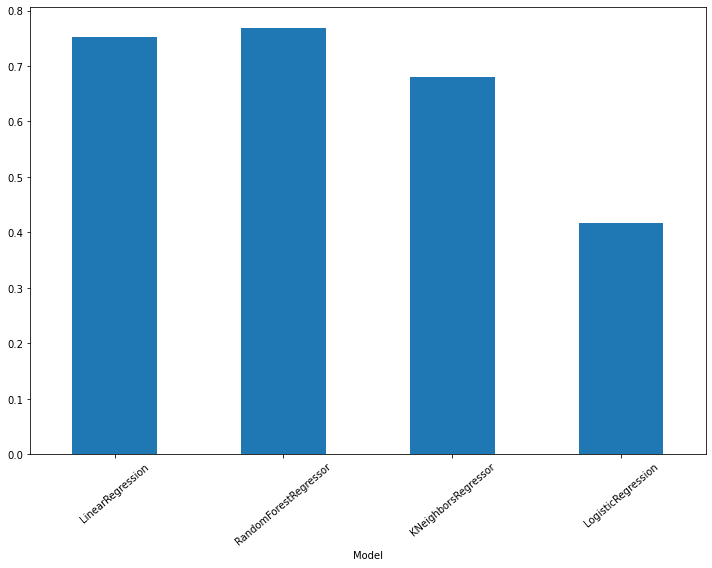

In [38]:
test_models = pd.DataFrame()
temp = {}


for model in models:
    model_name = str(model)
    temp['Model'] = model_name[:model_name.index('(')]
    model.fit(xtrain, ytrain['Price'])
    temp['R2_Price'] = r2_score(ytest['Price'], model.predict(xtest))
    test_models = test_models.append([temp])

test_models.set_index('Model', inplace = True)
fig, axes = plt.subplots(ncols = 1, figsize = (10, 8))
test_models.R2_Price.plot(ax = axes, kind = 'bar', rot = 40)
plt.tight_layout()
plt.show()

In [41]:
model = RandomForestRegressor(n_estimators = 400,
                             max_features = 'sqrt',
                             criterion = 'mse',min_samples_split = 2)

In [42]:
model.fit(xtrain, ytrain.values.ravel())

RandomForestRegressor(max_features='sqrt', n_estimators=400)

In [54]:
pred = model.predict(xtrain)

print('Model Training data accuracy: {}'.format(model.score(xtrain, ytrain)))

Model Training data accuracy: 0.9650876943771496


In [55]:
ypred = model.predict(xtest)
print("Model Test Data Accuracy is : {}".format(model.score(xtest, ytest)))

Model Test Data Accuracy is : 0.7625952207638699


####  Predicted Value VS Actual Values

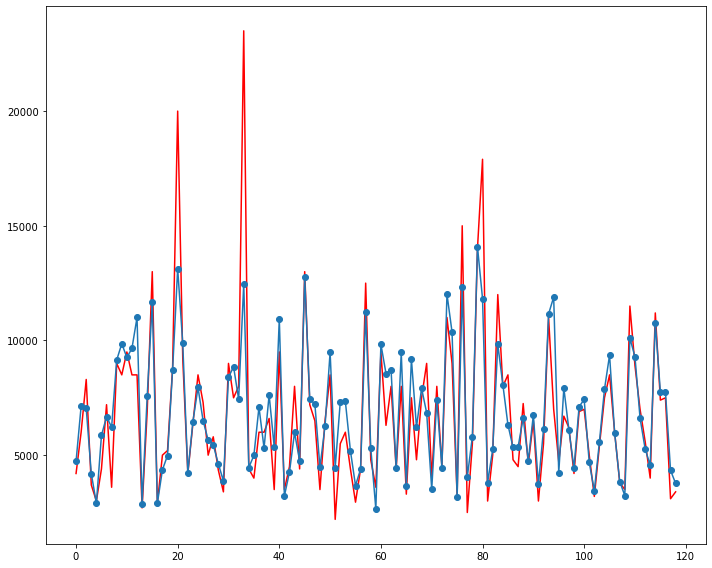

In [57]:
plt.figure(figsize = (10, 8))
plt.plot(range(0, ytest.shape[0]), ytest, color = 'red')
plt.plot(range(0, ypred.shape[0]), ypred, marker = 'o')
plt.tight_layout()
plt.show()

In [60]:
results = pd.concat([xtest, ytest], axis = 1)
results['predicted_price'] = ypred

In [61]:
print(results[['Price', 'predicted_price']].head())

      Price  predicted_price
333  4200.0       4729.50000
396  6000.0       7136.25000
148  8300.0       7039.68750
125  3700.0       4196.36250
20   3000.0       2896.40625


/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[None, None]

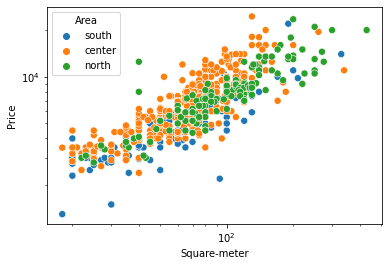

In [63]:
plot = sns.scatterplot(apartment_datasets['Square-meter'], apartment_datasets['Price'], hue = apartment_datasets['Area'], s = 50)
plot.set(xscale = 'log', yscale = 'log')

In [65]:
features = ['Price', 'Rooms', 'Square-meter', 'Floor', 'Area', 'Elevator','Refurbished','Furniture']
train_dataset = [features]

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(train_datasets.drop('Area', axis = 1), train_datasets[['Area']], test_size = 0.2)

In [68]:
k_range = range(2, 100)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain.values.ravel())
    pred = knn.predict(xtest)
    scores[k] = metrics.accuracy_score(ytest, pred)
    scores_list.append(metrics.accuracy_score(ytest, pred))
    
    
plt.plot(k_range, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

max_score = max(scores, key = scores.get)

ValueError: could not convert string to float: ' שפירא, תל אביב יפו '